Write a program to implement the SSIM index. Your program should also display the SSIM
map. Generate test images by adding noise, blurring and compressing the reference image (all
separately)

SSIM (reference vs noise): 0.9478395489162635
SSIM (reference vs blur): 0.9931912747914174
SSIM (reference vs compress): 0.8292724198687733


Text(0.5, 1.0, 'Compressed Image')

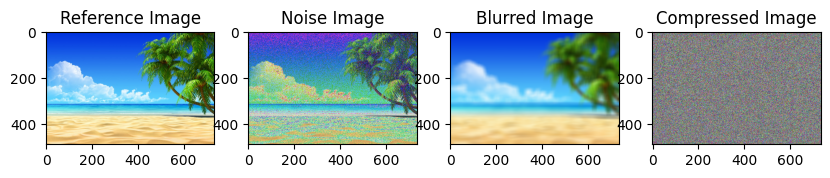

In [5]:
import numpy as np
from scipy import signal
from matplotlib import pyplot as plt

def ssim(img1, img2, k1=0.01, k2=0.03, L=255):
    """Compute the structural similarity index between two images."""
    c1 = (k1 * L) ** 2
    c2 = (k2 * L) ** 2
    window = np.ones((11, 11)) / 121

    mu1 = np.convolve(img1.ravel(), window.ravel(), mode="same").reshape(img1.shape)
    mu2 = np.convolve(img2.ravel(), window.ravel(), mode="same").reshape(img2.shape)

    mu1_sq = mu1 ** 2
    mu2_sq = mu2 ** 2
    mu1_mu2 = mu1 * mu2

    sigma1_sq = np.convolve(img1.ravel() ** 2, window.ravel(), mode="same").reshape(img1.shape) - mu1_sq
    sigma2_sq = np.convolve(img2.ravel() ** 2, window.ravel(), mode="same").reshape(img2.shape) - mu2_sq
    sigma12 = np.convolve(img1.ravel() * img2.ravel(), window.ravel(), mode="same").reshape(img1.shape) - mu1_mu2

    ssim_map = ((2 * mu1_mu2 + c1) * (2 * sigma12 + c2)) / ((mu1_sq + mu2_sq + c1) * (sigma1_sq + sigma2_sq + c2))

    return np.mean(ssim_map)

# Load reference image
img_ref = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\bg1.jpg")

# Generate test images
img_noise = img_ref + np.random.normal(0, 20, img_ref.shape).astype(np.uint8)
img_blur = np.zeros_like(img_ref)
for c in range(img_ref.shape[2]):
    img_blur[:, :, c] = signal.convolve2d(img_ref[:, :, c], np.ones((21, 21)) / 441, mode="same", boundary="symm")
img_compress = np.frombuffer(np.random.bytes(img_ref.size), dtype=np.uint8).reshape(img_ref.shape)

# Calculate SSIM values
ssim_noise = ssim(img_ref, img_noise)
ssim_blur = ssim(img_ref, img_blur)
ssim_compress = ssim(img_ref, img_compress)

# Display SSIM values
print(f"SSIM (reference vs noise): {ssim_noise}")
print(f"SSIM (reference vs blur): {ssim_blur}")
print(f"SSIM (reference vs compress): {ssim_compress}")

#Display Images
fig,axis = plt.subplots(1,4,figsize = (10,20))

axis[0].imshow(img_ref,cmap='gray')
axis[0].set_title("Reference Image")

axis[1].imshow(img_noise,cmap='gray')
axis[1].set_title("Noise Image")

axis[2].imshow(img_blur,cmap='gray')
axis[2].set_title("Blurred Image")

axis[3].imshow(img_compress,cmap='gray')
axis[3].set_title("Compressed Image")


Implement Harris Corner Detection Algorithm

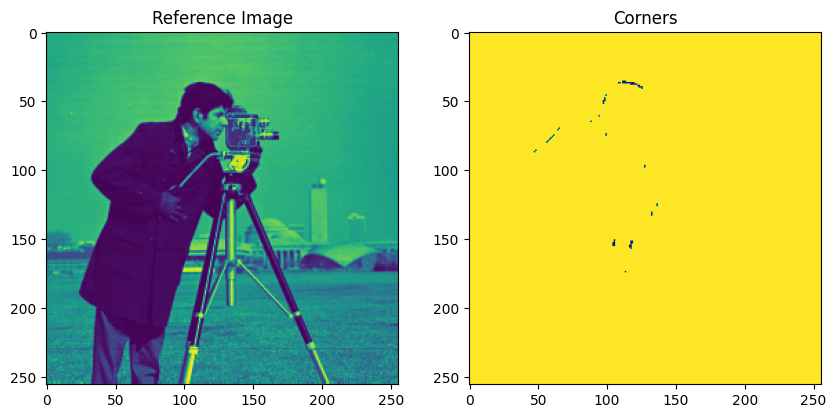

In [27]:
import numpy as np
import cv2

def harris_corner_detector(image, k=0.04, threshold=0.1, window_size=3):
    # Calculate gradients using Sobel filters
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)

    # Compute products of derivatives at each pixel
    Ixx = sobel_x ** 2
    Ixy = sobel_x * sobel_y
    Iyy = sobel_y ** 2

    # Convolve products of derivatives with a window
    kernel = np.ones((window_size, window_size))
    Sxx = cv2.filter2D(Ixx, -1, kernel)
    Sxy = cv2.filter2D(Ixy, -1, kernel)
    Syy = cv2.filter2D(Iyy, -1, kernel)

    # Calculate determinant and trace of the covariance matrix at each pixel
    det = (Sxx * Syy) - (Sxy ** 2)
    trace = Sxx + Syy

    # Compute Harris response for each pixel
    harris_response = det - k * (trace ** 2)

    # Normalize Harris response values to [0, 1]
    harris_response_norm = (harris_response - np.min(harris_response)) / (np.max(harris_response) - np.min(harris_response))

    # Threshold Harris response values
    corners = np.zeros_like(image)
    corners[harris_response_norm > threshold] = 255

    return corners

# Load input image
image = plt.imread(r"C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\cameraman.png")

# Apply Harris Corner Detection
corners = harris_corner_detector(image)

# Display output image
fig,axis = plt.subplots(1,2,figsize=(10,5))
axis[0].imshow(image)
axis[0].set_title("Reference Image")

axis[1].imshow(corners)
axis[1].set_title("Corners")
plt.show()




Implement Hough Transform to detect lines and circles using OPEN-CV


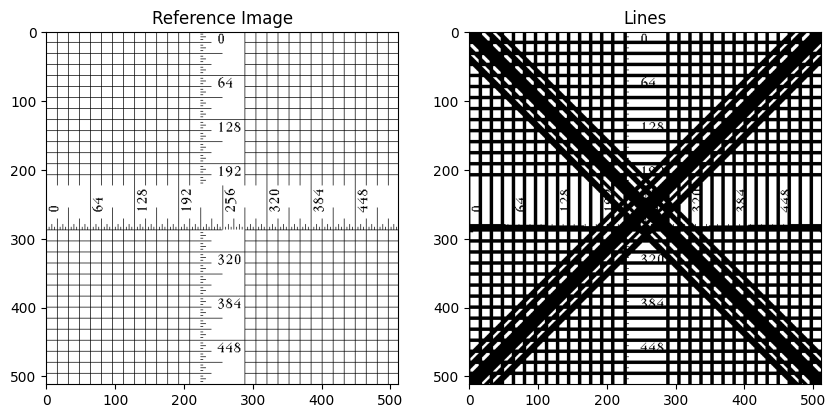

In [37]:
import cv2
import numpy as np

# Load image and convert to grayscale
img = cv2.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\ruler.512.tiff')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig,axis = plt.subplots(1,2,figsize=(10,5))
axis[0].imshow(img)
axis[0].set_title("Reference Image")
# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough Transform for line detection
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# Draw detected lines on original image
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 0), 2)


# Display output image
axis[1].imshow(img)
axis[1].set_title("Lines")
plt.show()


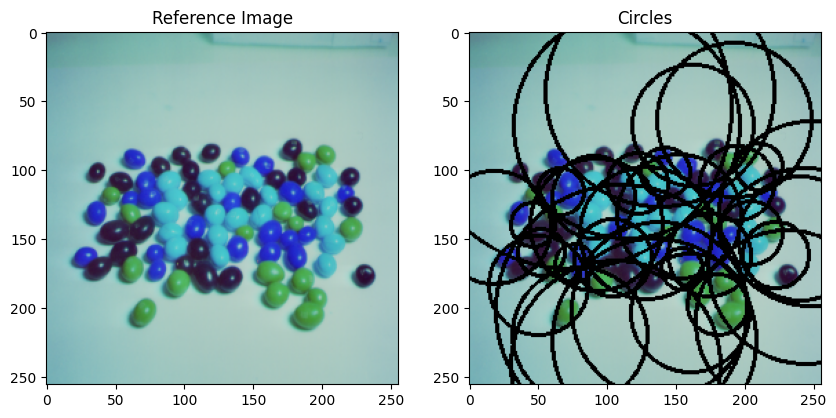

In [43]:
import cv2
import numpy as np

# Load image and convert to grayscale
img = cv2.imread(r'C:\Users\Asus\Documents\Python Codes\Assignments\DIP\misc\misc\4.1.08.tiff')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig,axis = plt.subplots(1,2,figsize=(10,5))
axis[0].imshow(img)
axis[0].set_title("Reference Image")

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

# Apply Hough Transform for circle detection
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=0, maxRadius=0)

# Draw detected circles on original image
if circles is not None:
    circles = np.round(circles[0, :]).astype("int")
    for (x, y, r) in circles:
        cv2.circle(img, (x, y), r, (0, 0, 0), 2)

# Display output image
axis[1].imshow(img)
axis[1].set_title("Circles")
plt.show()